In [25]:
# ATTENTION: only run this cell when on google colab
!git clone https://github.com/philshiu/Drosophila_brain_model.git
!pip install brian2
%cd Drosophila_brain_model

fatal: destination path 'Drosophila_brain_model' already exists and is not an empty directory.


WARNING    /Users/yaolab/.pyenv/versions/scanpyenv-3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
 [py.warnings]


/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/Drosophila_brain_model


In [26]:
import os
print(os.getcwd())


/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/Drosophila_brain_model


In [27]:
import os
print(os.listdir('.'))


['environment_full.yml', 'Connectivity_783.parquet', 'Completeness_783.csv', '2023_03_23_connectivity_630_final.parquet', 'Connectivity_783.csv', '.DS_Store', 'LICENSE', 'environment.yml', 'sez_neurons.pickle', '__pycache__', 'model.py', 'Readme.md', 'example.ipynb', 'results', '.gitignore', 'utils.py', 'set_1.csv', 'set_3.csv', '.git', 'set_2.csv', 'set_6.csv', 'figures.ipynb', 'set_5.csv', '2023_03_23_completeness_630_final.csv', 'set_4.csv']


In [28]:
from model import run_exp
from model import default_params as params
import utils as utl
from brian2 import Hz
import pickle
from pathlib import Path

config = {
    'path_comp' : '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/2023_03_23_completeness_630_final.csv',
    'path_con'  : '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/2023_03_23_connectivity_630_final.parquet',
    'n_proc'    : 15,
}


# Figure 1

In [29]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data'
os.makedirs(output_path, exist_ok=True)


In [30]:
# set output path
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data')

## Figure 1 D

In [31]:
# define inputs
# list of the labellar sugar-sensing gustatory receptor neurons on right hemisphere
neu_sugar = [
    720575940624963786, 720575940630233916, 720575940637568838, 720575940638202345, 720575940617000768,
    720575940630797113, 720575940632889389, 720575940621754367, 720575940621502051, 720575940640649691,
    720575940639332736, 720575940616885538, 720575940639198653, 720575940620900446, 720575940617937543,
    720575940632425919, 720575940633143833, 720575940612670570, 720575940628853239, 720575940629176663,
    720575940611875570,
]

# frequencies
freqs =  [ *range(10, 201, 10) ]

In [32]:
# run siumulations
# Calculate which neurons respond to sugar GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='sugarR_{}Hz'.format(f), neu_exc=neu_sugar, params=params, **config)

>>> Skipping experiment sugarR_10Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR_10Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR_20Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR_20Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR_30Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR_30Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR_40Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR_40Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR_50Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlor

In [33]:
import os
print(os.path.exists('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR_10Hz.parquet'))


True


In [34]:
ps = ['{}/sugarR_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]


In [35]:
ps = []
for f in freqs:
    file_path = config['path_res'] / f'sugarR_{f}Hz.parquet'
    if os.path.exists(file_path):
        ps.append(str(file_path))
    else:
        print(f"Warning: {file_path} does not exist.")


In [36]:
# process result
# dictionary containing the GRN names and each Flywire ID.
flyid2name = { f: 'sugar_{}'.format(i+1) for i, f in enumerate(neu_sugar) }
flyid2name

# list of output files
ps = ['{}/sugarR_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.fillna(0).to_csv(config['path_res'].parent / 'fig_1d_rate.csv')
df_rate_std.fillna(0).to_csv(config['path_res'].parent / 'fig_1d_rate_std.csv')

# save 200 neurons for next simulation
id_top200 = df_rate.sort_values('sugarR_200Hz', ascending=False).index[:10]
with open(config['path_res'].parent / 'fig_1d_id_top200.pickle', 'wb') as f:
    pickle.dump(id_top200, f)

In [44]:
print(df_rate.head())
print(df_rate.dtypes)


                   name  sugarR_10Hz  sugarR_20Hz  sugarR_30Hz  sugarR_40Hz  \
flyid                                                                         
720575940605420902  NaN          0.0          0.0     0.000000     0.000000   
720575940605494560  NaN          0.0          0.0     0.000000     0.000000   
720575940605513649  NaN          0.0          0.0     0.000000     0.166667   
720575940605658033  NaN          0.0          0.0     0.033333     0.633333   
720575940605682790  NaN          0.0          0.0     0.000000     0.100000   

                    sugarR_50Hz  sugarR_60Hz  sugarR_70Hz  sugarR_80Hz  \
flyid                                                                    
720575940605420902     0.000000     0.000000     0.000000     0.000000   
720575940605494560     0.000000     0.033333     0.000000     0.000000   
720575940605513649     0.766667     1.733333     2.200000     2.466667   
720575940605658033     4.533333     9.400000    13.033333    15.366667   
72

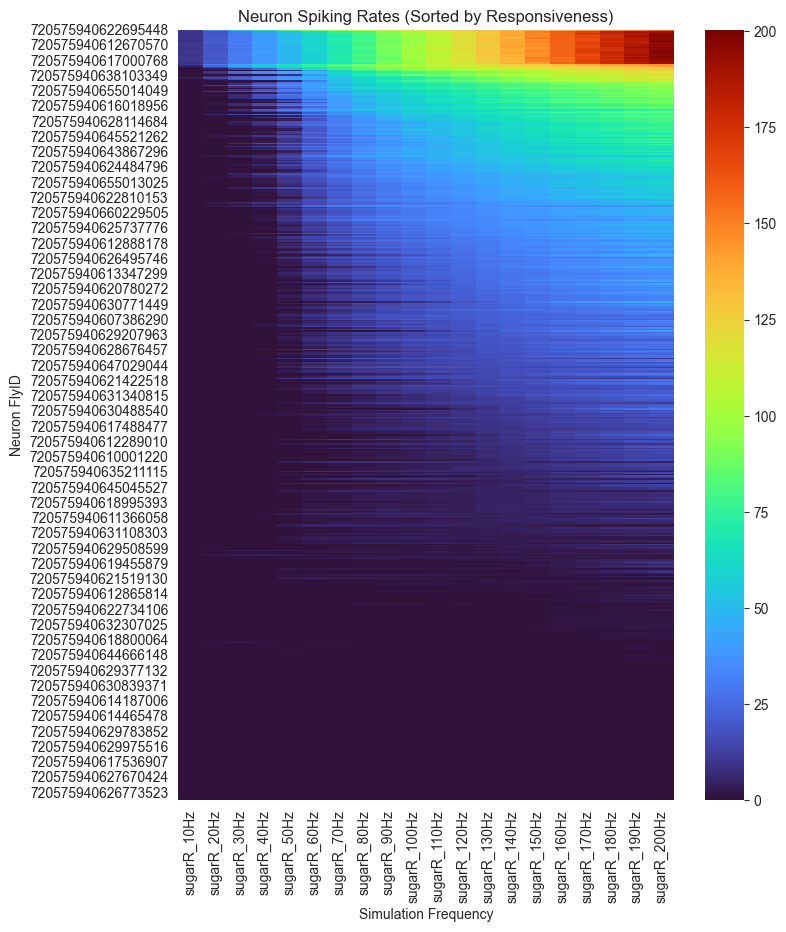

In [60]:
# Calculate the total responsiveness for each neuron
df_numeric['responsiveness'] = df_numeric.sum(axis=1)

# Sort the DataFrame by responsiveness in descending order
df_sorted = df_numeric.sort_values('responsiveness', ascending=False)

# Optionally, drop the extra column used for sorting
df_sorted = df_sorted.drop(columns=['responsiveness'])

# Plot the sorted heat map
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.heatmap(df_sorted, annot=False, cmap='turbo')
plt.title("Neuron Spiking Rates (Sorted by Responsiveness)")
plt.xlabel("Simulation Frequency")
plt.ylabel("Neuron FlyID")
plt.show()


## Figure 1 E:  Which neurons activate MN9?

In [37]:
# define inputs
# flywire ID for MN9
id_mn9 = 720575940660219265

# identify the top 200 neurons that respond due to 200 Hz sugar firing (Figure 1D)
with open(config['path_res'].parent / 'fig_1d_id_top200.pickle', 'rb') as f:
    id_top200 = pickle.load(f)

# frequencies
freqs = [25, 50, 75, 100, 125, 150, 175, 200]

In [38]:
# run simulations at different frequencies
for freq in freqs:

    params['r_poi'] = freq * Hz

    for i in id_top200:
        run_exp(exp_name='{}_Hz_{}'.format(freq, i), neu_exc=[ i ], params=params, **config)

>>> Skipping experiment 25_Hz_720575940639198653 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/25_Hz_720575940639198653.parquet exists and force_overwrite = False
>>> Skipping experiment 25_Hz_720575940630797113 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/25_Hz_720575940630797113.parquet exists and force_overwrite = False
>>> Skipping experiment 25_Hz_720575940617937543 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/25_Hz_720575940617937543.parquet exists and force_overwrite = False
>>> Skipping experiment 25_Hz_720575940621502051 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/25_Hz_720575940621502051.parquet exists and force_overwrite = False


In [50]:
# process results
for freq in freqs:

    ps = [ '{}/{}_Hz_{}.parquet'.format(config['path_res'], freq, i) for i in id_top200 ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_1e_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_1e_{}_hz_rate_std.csv'.format(freq))

KeyError: 720575940660219265

## Figure 1F: Silencing

In [16]:
# identify the top 200 neurons that respond due to 200 Hz sugar firing (Figure 1D)
with open(config['path_res'].parent / 'fig_1d_id_top200.pickle', 'rb') as f:
    id_top200 = pickle.load(f)

# frequencies
freqs = [ 50, 60, 70, 80, 90, 100, 110, 120 ]

In [17]:
# Run simulations at different frequencies
for freq in freqs:
    params['r_poi'] = freq * Hz

    for i in id_top200:
        run_exp(exp_name='sugarR-silencing{}_{}_Hz'.format(i, freq), neu_exc=neu_sugar, neu_slnc=[ i ], params=params, **config)
#this took about 3 hours 17 mins for just 10 root ids

>>> Skipping experiment sugarR-silencing720575940639198653_50_Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR-silencing720575940639198653_50_Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR-silencing720575940630797113_50_Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR-silencing720575940630797113_50_Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR-silencing720575940617937543_50_Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_1/data/sugarR-silencing720575940617937543_50_Hz.parquet exists and force_overwrite = False
>>> Skipping experiment sugarR-silencing720575940621502051_50_Hz because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/D

In [18]:
# process results
for freq in freqs:

    ps = [ '{}/sugarR-silencing{}_{}_Hz.parquet'.format(config['path_res'], i, freq) for i in id_top200 ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_1f_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_1f_{}_hz_rate_std.csv'.format(freq))

# Figure 2

In [19]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data'
os.makedirs(output_path, exist_ok=True)

In [20]:
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data')

In [21]:
# define input
ids_mn9 = [720575940660219265, 720575940645521262] # left and right

with open('./sez_neurons.pickle', 'rb') as f:
    types_and_ids = pickle.load(f)

freqs = [50, 100, 150, 200]

In [22]:
# run simulations
for freq in freqs:
    params['r_poi'] = freq * Hz

    for name, neurons in types_and_ids.items():
        run_exp(exp_name='{}_Hz_{}'.format(freq, name), neu_exc=neurons, params=params, **config)

>>> Skipping experiment 50_Hz_aDT6 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_aDT6.parquet exists and force_overwrite = False
>>> Skipping experiment 50_Hz_amulet because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_amulet.parquet exists and force_overwrite = False
>>> Skipping experiment 50_Hz_aSG1 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_aSG1.parquet exists and force_overwrite = False
>>> Skipping experiment 50_Hz_aSG7 because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_aSG7.parquet exists and force_overwrite = False
>>> Skipping experiment 50_Hz_aster because /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/

INFO       Cache size for target 'cython': 1399 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1399 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1399 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1399 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1399 MB.
You can call clear_cache('cython

    Elapsed time:   124 s
>>> Experiment:     50_Hz_haystack
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_haystack.parquet
    Excited neurons: 2
    Elapsed time:   130 s
>>> Experiment:     50_Hz_horntail
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_horntail.parquet
    Excited neurons: 2
    Elapsed time:   128 s
>>> Experiment:     50_Hz_horseshoe
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_horseshoe.parquet
    Excited neurons: 9
    Elapsed time:   155 s
>>> Experiment:     50_Hz_horn
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_2/data/50_Hz_horn.parquet
    Excited neurons: 


KeyboardInterrupt



In [ ]:
# process results
for freq in freqs:
    ps = [ config['path_res'] / '{}_Hz_{}.parquet'.format(freq, name) for name in types_and_ids.keys() ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ ids_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_2_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ ids_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_2_{}_hz_rate_std.csv'.format(freq))

# Figure 3

In [73]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure3/data'
os.makedirs(output_path, exist_ok=True)

In [74]:
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_3/data')

## Figure 3 A

In [75]:
# define inputs
# lists of all the labellar sugar-sensing gustatory receptor neurons on right hemisphere
neu_sugar = [
    720575940624963786, 720575940630233916, 720575940637568838, 720575940638202345, 720575940617000768,
    720575940630797113, 720575940632889389, 720575940621754367, 720575940621502051, 720575940640649691,
    720575940639332736, 720575940616885538, 720575940639198653, 720575940620900446, 720575940617937543,
    720575940632425919, 720575940633143833, 720575940612670570, 720575940628853239, 720575940629176663,
    720575940611875570,
]

neu_bitter = [
    720575940621778381, 720575940602353632, 720575940617094208, 720575940619197093, 720575940626287336,
    720575940618600651, 720575940627692048, 720575940630195909, 720575940646212996, 720575940610483162,
    720575940645743412, 720575940627578156, 720575940622298631, 720575940621008895, 720575940629146711,
    720575940610259370, 720575940610481370, 720575940619028208, 720575940614281266, 720575940613061118,
    720575940604027168
]

neu_ir94e = [
    720575940614211295, 720575940638218173, 720575940628832256, 720575940626016017, 720575940621375231,
    720575940612920386, 720575940614273292, 720575940628198503, 720575940626241636, 720575940619387814,
    720575940624604560, 720575940615274425, 720575940610683315, 720575940627265265, 720575940624079544,
    720575940629211607, 720575940615089369, 720575940631082124
]

id_mn9 = 720575940660219265 # left

freqs = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

In [76]:
# run simulations
for freq_sugar in freqs:
  for freq_bitter in freqs:
    params['r_poi'] = freq_sugar * Hz
    params['r_poi2'] = freq_bitter * Hz
    run_exp(exp_name='Sugar_Bitter_{}_Hz_{}_Hz'.format(freq_sugar, freq_bitter), neu_exc=neu_sugar, neu_exc2=neu_bitter, params=params, **config)

>>> Experiment:     Sugar_Bitter_0_Hz_0_Hz
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_3/data/Sugar_Bitter_0_Hz_0_Hz.parquet
    Excited neurons: 42


INFO       Cache size for target 'cython': 1400 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1400 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1400 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1400 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1400 MB.
You can call clear_cache('cython

KeyboardInterrupt: 

In [ ]:
# process restuls
ps = []
for freq_sugar in freqs:
  for freq_bitter in freqs:
    ps.append('./{}/Sugar_Bitter_{}_Hz_{}_Hz.parquet'.format(config['path_res'], freq_sugar, freq_bitter))

df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_3a_rate.csv')
df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_3a_rate_std.csv')

## Figure 3 B

In [77]:
# run simulations
for freq_sugar in freqs:
  for freq_ir94e in freqs:
    params['r_poi'] = freq_sugar * Hz
    params['r_poi2'] = freq_ir94e * Hz
    run_exp(exp_name='Sugar_Ir94e_{}_Hz_{}_Hz'.format(freq_sugar, freq_ir94e), neu_exc=neu_sugar, neu_exc2=neu_ir94e, params=params, **config)

>>> Experiment:     Sugar_Ir94e_0_Hz_0_Hz
    Output file:    /Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_3/data/Sugar_Ir94e_0_Hz_0_Hz.parquet
    Excited neurons: 39


INFO       Cache size for target 'cython': 1401 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1401 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1401 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1401 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/Users/yaolab/Library/Caches/cython/brian_extensions' directory. [brian2]
INFO       Cache size for target 'cython': 1401 MB.
You can call clear_cache('cython

    Elapsed time:   317 s


OSError: Cannot save file into a non-existent directory: '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_3/data'

In [ ]:
# process results
ps = []
for freq_sugar in freqs:
  for freq_ir94e in freqs:
    ps.append('./{}/Sugar_Ir94e_{}_Hz_{}_Hz.parquet'.format(config['path_res'], freq_sugar, freq_ir94e))

df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_3b_rate.csv')
df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_3b_rate_std.csv')

# Figure 4

In [ ]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_4/data'
os.makedirs(output_path, exist_ok=True)

In [ ]:
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_4/data')

## Figure 4a

In [ ]:
# define inputs
# list of the labellar water-sensing gustatory receptor neurons on right hemisphere
neu_water = [
  720575940612950568,720575940631898285,720575940606002609,720575940612579053,720575940622902535,
  720575940616177458,720575940660292225,720575940622486922,720575940613786774,720575940629852866,
  720575940625861168,720575940613996959,720575940617857694,720575940644965399,720575940625203504,
  720575940630553415,720575940635172191,720575940634796536
]

flyid2name = { f: 'water_{}'.format(i+1) for i, f in enumerate(neu_water) }
flyid2name

# frequencies
freqs =  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]

In [ ]:
# calculate which neurons respond to water GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='waterR_{}Hz'.format(f), neu_exc=neu_water, params=params, **config)

In [ ]:
# process results
# list of output files
ps = [ config['path_res'] / 'waterR_{}Hz.parquet'.format(f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.fillna(0).to_csv(config['path_res'].parent / 'fig_4a_rate.csv')
df_rate_std.fillna(0).to_csv(config['path_res'].parent / 'fig_4a_rate_std.csv')

# save 200 neurons for next simulation
id_top200_water = df_rate.sort_values('waterR_260Hz', ascending=False).index[:200]
with open(config['path_res'].parent / 'id_top200_water.pickle', 'wb') as f:
    pickle.dump(id_top200_water, f)

## Figure 4b

In [ ]:
# define inputs
# flywire ID for MN9
id_mn9 = 720575940660219265

# identify the top 200 neurons that respond due to 200 Hz water firing (Figure 1D)
with open(config['path_res'].parent / 'id_top200_water.pickle', 'rb') as f:
    id_top200_water = pickle.load(f)

# frequencies
freqs = [25, 50, 75, 100, 125, 150, 175, 200]

In [ ]:
# run simulations at different frequencies
for freq in freqs:

    params['r_poi'] = freq * Hz

    for i in id_top200_water:
        run_exp(exp_name='{}_Hz_{}_water'.format(freq, i), neu_exc=[ i ], params=params, **config)

In [ ]:
# process results
for freq in freqs:

    ps = [ config['path_res'] / '{}_Hz_{}_water.parquet'.format(freq, i) for i in id_top200_water ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4b_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4b_{}_hz_rate_std.csv'.format(freq))

## Figure 4c

In [ ]:
# define input frequencies
freqs = [160, 170, 180, 190, 200, 210, 220]

In [ ]:
# Run simulations at different frequencies
for freq in freqs:
    params['r_poi'] = freq * Hz

    for i in id_top200_water:
        run_exp(exp_name='waterR-silencing{}_{}_Hz'.format(i, freq), neu_exc=neu_water, neu_slnc=[ i ], params=params, **config)

In [ ]:
for freq in freqs:

    ps = [ config['path_res'] / 'waterR-silencing{}_{}_Hz.parquet'.format(i, freq) for i in id_top200_water ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4c_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4c_{}_hz_rate_std.csv'.format(freq))

## Figure 4e

In [ ]:
# define inputs
# lists of all the labellar sugar-sensing gustatory receptor neurons on right hemisphere
neu_sugar = [
    720575940624963786, 720575940630233916, 720575940637568838, 720575940638202345, 720575940617000768,
    720575940630797113, 720575940632889389, 720575940621754367, 720575940621502051, 720575940640649691,
    720575940639332736, 720575940616885538, 720575940639198653, 720575940620900446, 720575940617937543,
    720575940632425919, 720575940633143833, 720575940612670570, 720575940628853239, 720575940629176663,
    720575940611875570,
]

sugar_freqs = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
water_freqs = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]

In [ ]:
# run simulations
for freq_sugar in sugar_freqs:
  for freq_water in water_freqs:
    params['r_poi'] = freq_sugar * Hz
    params['r_poi2'] = freq_water * Hz
    run_exp(exp_name='Sugar_Water_{}_Hz_{}_Hz'.format(freq_sugar, freq_water), neu_exc=neu_sugar, neu_exc2=neu_water, params=params, **config)

In [ ]:
ps = []
for freq_sugar in sugar_freqs:
  for freq_water in water_freqs:
    ps.append(config['path_res'] / 'Sugar_Water_{}_Hz_{}_Hz.parquet'.format(freq_sugar, freq_water))

df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

df_rate.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4e_rate.csv')
df_rate_std.loc[ id_mn9, :].fillna(0).to_csv(config['path_res'].parent / 'fig_4e_rate_std.csv')

# Figure 5

In [ ]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_5/data'
os.makedirs(output_path, exist_ok=True)

In [ ]:
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_5/data')

## Figure 5b

In [ ]:
# define inputs
# list of the  JONs
neu_JON_CE = [
    720575940619341105,720575940630122015,720575940611061526,720575940615848788,720575940628444667,720575940627941431,720575940632449619,720575940650244342,
    720575940631866508,720575940638681845,720575940628978450,720575940609522461,720575940621442224,720575940602506208,720575940629022149,720575940627109991,
    720575940630020111,720575940615986459,720575940618684481,720575940620382889,720575940630080071,720575940626565455,720575940630319671,720575940602720940,
    720575940630564179,720575940637632419,720575940615809349,720575940626042149,720575940637054835,720575940602132509,720575940614188149,720575940616951124,
    720575940628101126,720575940629055721,720575940616589878,720575940622449388,720575940614427195,720575940625797617,720575940638664437,720575940618467195,
    720575940621729757,720575940613971485,720575940627585688,720575940629650997,720575940630059847,720575940608742409,720575940614351477,720575940633153375,
    720575940622937528,720575940604753437,720575940611783464,720575940618599872,720575940609541917,720575940637410869,720575940630070343,720575940621397417,
    720575940614035485,720575940610018266,720575940626307902,720575940634634606,720575940614060829,720575940624799290,720575940641921421,720575940623298559,
    720575940625559358,720575940629138959,720575940621625597,720575940625962568,720575940632767383,720575940624915230]

neu_JON_F = [
    720575940606239243,720575940626956777,720575940604973746,720575940622222856,720575940642517284,720575940629719404,720575940616613022,720575940604299454,
    720575940615473186,720575940622217992,720575940606800341,720575940629267498,720575940637366335,720575940624224408,720575940609543197,720575940633364179,
    720575940629502009,720575940606431189,720575940625733960,720575940638529525,720575940617524053,720575940628935564,720575940624308355,720575940631170346,
    720575940627704375,720575940625885512,720575940614929245,720575940647493241,720575940618888368,720575940625087546,720575940606657493,720575940617273560,
    720575940640591861,720575940639410035,720575940621532413,720575940627523584,720575940621521917,720575940621097398,720575940625915338,720575940606222428,
    720575940627868471,720575940622179497,720575940608297774,720575940614026269,720575940613012959,720575940628100614,720575940606611401,720575940628649465,
    720575940610008217,720575940623791152,720575940625571240,720575940634923621,720575940609530653,720575940635968745,720575940625703434,720575940613105311,
    720575940629386819,720575940623077389,720575940625763015,720575940628359017
]

neu_JON_D_m = [
    720575940630834171,720575940622892988,720575940621289537,720575940641395163,720575940616064546,720575940628978409,720575940652566177,720575940627493096,
    720575940619085397,720575940635545310,720575940645728803,720575940629141775,720575940626557995,720575940631098338,720575940639904475,720575940635067034]

neu_JON_all = neu_JON_CE + neu_JON_F + neu_JON_D_m

# dictionary containing the GRN names and each Flywire ID.
flyid2name = { f: 'JON_{}'.format(i+1) for i, f in enumerate(neu_JON_all) }
flyid2name

# frequencies
freqs =  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]

In [ ]:
# Calculate which neurons respond to JON GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='JON_All_{}Hz'.format(f), neu_exc=neu_JON_all, params=params, **config)

In [ ]:
# process results
# list of output files
ps = [ config['path_res'] / 'JON_All_{}Hz.parquet'.format(f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.fillna(0).to_csv(config['path_res'].parent / 'fig_5b_rate.csv')
df_rate_std.fillna(0).to_csv(config['path_res'].parent / 'fig_5b_rate_std.csv')

# save 300 neurons for next simulation
id_top300_JON = df_rate.sort_values('JON_All_220Hz', ascending=False).index[:300]
with open(config['path_res'].parent / 'id_top300_JON.pickle', 'wb') as f:
    pickle.dump(id_top300_JON, f)

## Figure 5c

In [ ]:
# flywire ID for MN9
id_DN1_1 = 720575940616185531
id_DN2_l = 720575940629806974

# identify the top 200 neurons that respond due to 220 Hz JON firing (Figure 5A)
with open(config['path_res'].parent / 'id_top300_JON.pickle', 'rb') as f:
    id_top300_JON = pickle.load(f)

# frequencies
freqs = [25, 50, 75, 100, 125, 150, 175, 200]

In [ ]:
# run simulations at different frequencies
for freq in freqs:

    params['r_poi'] = freq * Hz

    for i in id_top300_JON:
        run_exp(exp_name='Figure_5C_{}_Hz_{}'.format(freq, i), neu_exc=[ i ], params=params, **config)

In [ ]:
# process results
for freq in freqs:

    ps = [ config['path_res'] / 'Figure_5C_{}_Hz_{}.parquet'.format(freq, i) for i in id_top300_JON ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_DN1_1, :].fillna(0).to_csv(config['path_res'].parent / 'fig_5c_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_DN1_1, :].fillna(0).to_csv(config['path_res'].parent / 'fig_5c_{}_hz_rate_std.csv'.format(freq))

## Figure 5d

In [ ]:
# frequencies
freqs = [140, 150, 160, 170, 180]

In [ ]:
# Run simulations at different frequencies
for freq in freqs:
    params['r_poi'] = freq * Hz

    for i in id_top300_JON:
        run_exp(exp_name='JON-silencing{}_{}_Hz'.format(i, freq), neu_exc=neu_JON_all, neu_slnc=[ i ], params=params, **config)

In [ ]:
for freq in freqs:

    ps = [ '{}/JON-silencing{}_{}_Hz.parquet'.format(config['path_res'], i, freq) for i in id_top300_JON ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])

    df_rate.loc[ id_DN1_1, :].fillna(0).to_csv(config['path_res'].parent / 'fig_5d_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_DN1_1, :].fillna(0).to_csv(config['path_res'].parent / 'fig_5d_{}_hz_std.csv'.format(freq))

    df_rate.loc[ id_DN2_l, :].fillna(0).to_csv('./results/figure_s4/fig_s4b_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_DN2_l, :].fillna(0).to_csv('./results/figure_s4/fig_s4b_{}_hz_std.csv'.format(freq))

## Figure 5g + S5

In [ ]:
id_aBN1 = 720575940630907434

# frequencies
freqs =  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]

### JON-CE

In [ ]:
# Calculate which neurons respond to JON GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='JON_CE_{}Hz'.format(f), neu_exc=neu_JON_CE, params=params, **config)

In [ ]:

# list of output files
ps = ['{}/JON_CE_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.loc[ id_aBN1, :].fillna(0).to_csv(config['path_res'] / 'fig_5g_JON_CE_rate.csv')
df_rate_std.loc[ id_aBN1, :].fillna(0).to_csv(config['path_res'] / 'fig_5g_JON_CE_std.csv')



### JON-F

In [ ]:
# Calculate which neurons respond to JON GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='JON_F_{}Hz'.format(f), neu_exc=neu_JON_F,  params=params, **config)

In [ ]:
# list of output files
ps = ['{}/JON_F_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.loc[ id_aBN1, :].fillna(0).to_csv(config['path_res'] / 'fig_5g_JON_F_rate.csv')
df_rate_std.loc[ id_aBN1, :].fillna(0).to_csv(config['path_res'] / 'fig_5g_JON_F_std.csv')



### JON-F + silencing

In [ ]:
three_inhibitory = [720575940636066222,720575940609957315,720575940624986407]

In [ ]:
# Calculate which neurons respond to JON GRN firing at the specified frequencies.
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='JON_F_Three_Silenced_{}Hz'.format(f), neu_exc=neu_JON_F, neu_slnc=three_inhibitory, params=params, **config)

In [ ]:
# list of output files
ps = ['{}/JON_F_Three_Silenced_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]

# load data from disk
df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

# save the spiking rates and standard deviations for each neuron
df_rate.fillna(0).loc[ id_aBN1, :].to_csv('./results/figure_s5/fig_s5c_JON_F_silenced_rate.csv')
df_rate_std.fillna(0).loc[ id_aBN1, :].to_csv('./results/figure_s5/fig_s5c_JON_F_silenced_.csv')



# Figure S1

In [ ]:
import os

output_path = '/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_s1/data'
os.makedirs(output_path, exist_ok=True)

In [ ]:
config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_s1/data')

## Figure S1D

In [ ]:
# define inputs
# left hemisphere sugar
neu_sugar_left = [
    720575940620589838, 720575940631147148, 720575940608305161, 720575940629388135, 720575940630968335,
    720575940606801282, 720575940617398502, 720575940616167218, 720575940620296641, 720575940627961104
    ]

flyid2name = { f: 'sugar_{}'.format(i+1) for i, f in enumerate(neu_sugar_left) }
flyid2name

# frequencies
freqs =  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

In [ ]:
# run simulations
for f in freqs:

    params['r_poi'] = f * Hz

    run_exp(exp_name='sugarL_{}Hz'.format(f), neu_exc=neu_sugar_left, params=params, **config)

In [ ]:
# process results
ps = ['{}/sugarL_{}Hz.parquet'.format(config['path_res'], f) for f in freqs ]

df_spike = utl.load_exps(ps)
df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'], flyid2name=flyid2name)

df_rate.fillna(0).to_csv(config['path_res'].parent / 'fig_s1d_rate.csv')
df_rate_std.fillna(0).to_csv(config['path_res'].parent / 'fig_s1d_rate_std.csv')

# Figure S4

In [ ]:
# define paths
p_fig5 = Path('config['path_res'] = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_5/')
id_top300_jon = p_fig5 / 'id_top300_JON.pickle'

p_figs4 = Path('/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/YaoLab/Drosophila_brain_model/results/figure_s4/')

In [ ]:
# flywire ID for MN9
id_DN1_1 = 720575940616185531
id_DN2_l = 720575940629806974

# identify the top 200 neurons that respond due to 220 Hz JON firing (Figure 5A)
with open(id_top300_jon, 'rb') as f:
    id_top300_JON = pickle.load(f)

# frequencies
freqs = [25, 50, 75, 100, 125, 150, 175, 200]

In [ ]:
# process results
for freq in freqs:

    ps = [ p_fig5 / 'data/Figure_5C_{}_Hz_{}.parquet'.format(freq, i) for i in id_top300_JON ]

    df_spike = utl.load_exps(ps)
    df_rate, df_rate_std = utl.get_rate(df_spike, t_run=params['t_run'], n_run=params['n_run'])
    df_rate.loc[ id_DN2_l, :].fillna(0).to_csv(p_figs4 / 'fig_s4a_{}_hz_rate.csv'.format(freq))
    df_rate_std.loc[ id_DN2_l, :].fillna(0).to_csv(p_figs4 / 'fig_s4a_{}_hz_rate_std.csv'.format(freq))